In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/food1.csv")

In [ ]:
df.head()

,Unnamed: 0,res_id,name,url,address,city,locality,cuisines,timings,average_cost_for_one,highlights,aggregate_rating,votes,scope
0,0,19000106,The Drowning Street,https://www.zomato.com/lucknow/the-drowning-st...,"TCG 3/3, Vibhuti Khand, Gomti Nagar, Lucknow",Lucknow,Gomti Nagar,"Cafe, North Indian, Chinese","12noon – 11:30pm (Mon-Thu),12noon – 12midnight...",600,"['Delivery', 'Dinner', 'Cash', 'Credit Card', ...",4.6,370,4.451709
1,1,800894,Mubeen's,https://www.zomato.com/lucknow/mubeens-chowk?u...,"Opposite Ek Minara Masjid, Akbari Gate, Chowk,...",Lucknow,Chowk,Mughlai,7:30 AM to 12 Midnight (Mon-Sun),150,"['Dinner', 'Takeaway Available', 'No Alcohol A...",4.4,1838,4.374357
2,2,18701292,Pirates of Grill,https://www.zomato.com/lucknow/pirates-of-gril...,"Ground Floor, Cyber Heights, Opposite Indra Ga...",Lucknow,Gomti Nagar,"North Indian, Mughlai, Continental","12 Noon to 3:30 PM, 6:30 PM to 11 PM",1000,"['Dinner', 'Cash', 'Credit Card', 'Debit Card'...",4.9,2095,4.854580
3,3,800468,Tunday Kababi,https://www.zomato.com/lucknow/tunday-kababi-2...,"168/6, Khayali Ganj, Naaz Cinema Road, Aminaba...",Lucknow,Aminabad,"Mughlai, Lucknowi",12:30 PM to 11:30 PM,150,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.8,4614,4.780972
4,4,18671102,Burger Point,https://www.zomato.com/lucknow/burger-point-3-...,"Ground Floor, 4/489-B, Chacha Cycle Road, Vibh...",Lucknow,Gomti Nagar,"Burger, Sandwich, Wraps, Fast Food","11am – 10:30pm (Mon, Tue, Wed, Thu, Fri, Sun),...",150,"['Lunch', 'Delivery', 'Breakfast', 'Debit Card...",4.3,725,4.251883


In [ ]:
df.columns

Index(['Unnamed: 0', 'res_id', 'name', 'url', 'address', 'city', 'locality',
       'cuisines', 'timings', 'average_cost_for_one', 'highlights',
       'aggregate_rating', 'votes', 'scope'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            465 non-null    int64  
 1   res_id                465 non-null    int64  
 2   name                  465 non-null    object 
 3   url                   465 non-null    object 
 4   address               465 non-null    object 
 5   city                  465 non-null    object 
 6   locality              465 non-null    object 
 7   cuisines              465 non-null    object 
 8   timings               463 non-null    object 
 9   average_cost_for_one  465 non-null    int64  
 10  highlights            465 non-null    object 
 11  aggregate_rating      465 non-null    float64
 12  votes                 465 non-null    int64  
 13  scope                 465 non-null    float64
dtypes: float64(2), int64(4), object(8)
memory usage: 51.0+ KB


Checking for duplicate values

In [ ]:
df.describe()

,Unnamed: 0,res_id,average_cost_for_one,aggregate_rating,votes,scope,cuisine_encoded,locality_encoded
count,465.000000,4.650000e+02,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,233.094624,9.085610e+06,0.208579,3.952258,429.060215,3.958068,127.025806,13.473118
std,136.282603,8.905542e+06,0.173365,0.370170,427.537890,0.277229,70.945397,11.114404
min,0.000000,8.000020e+05,0.000000,2.200000,100.000000,2.583566,0.000000,0.000000
25%,116.000000,8.005760e+05,0.090909,3.800000,163.000000,3.821465,62.000000,3.000000
50%,232.000000,8.016840e+05,0.163636,4.000000,308.000000,3.959931,142.000000,12.000000
75%,348.000000,1.863959e+07,0.272727,4.200000,501.000000,4.106023,183.000000,20.000000
max,491.000000,1.905872e+07,1.000000,4.900000,4614.000000,4.858460,247.000000,45.000000


In [ ]:
top_restaurants = df.sort_values(by=['aggregate_rating'], ascending=False)[:20]
top_restaurants

,Unnamed: 0,res_id,name,url,address,city,locality,cuisines,timings,average_cost_for_one,highlights,aggregate_rating,votes,scope,cuisine_encoded,locality_encoded
75,75,800089,Barbeque Nation,https://www.zomato.com/lucknow/barbeque-nation...,"3rd Floor, Riverside Mall, Vipin Khand, Gomti ...",Lucknow,"Riverside Mall, Gomti Nagar","North Indian, Chinese, Mediterranean","12noon – 3:30pm, 6pm – 12midnight (Mon-Sun)",0.563636,"['Dinner', 'Serves Alcohol', 'Cash', 'Credit C...",4.9,2300,4.858460,171,38
2,2,18701292,Pirates of Grill,https://www.zomato.com/lucknow/pirates-of-gril...,"Ground Floor, Cyber Heights, Opposite Indra Ga...",Lucknow,Gomti Nagar,"North Indian, Mughlai, Continental","12 Noon to 3:30 PM, 6:30 PM to 11 PM",0.709091,"['Dinner', 'Cash', 'Credit Card', 'Debit Card'...",4.9,2095,4.854580,208,12
26,26,18801082,Farzi Café,https://www.zomato.com/lucknow/farzi-café-1-go...,"Ground Floor, Rohtas Summit, Vibhuti Khand, Lu...",Lucknow,Gomti Nagar,Modern Indian,12noon – 1am (Mon-Sun),0.381818,"['Lunch', 'Credit Card', 'Dinner', 'Cash', 'De...",4.9,560,4.748944,143,12
3,3,800468,Tunday Kababi,https://www.zomato.com/lucknow/tunday-kababi-2...,"168/6, Khayali Ganj, Naaz Cinema Road, Aminaba...",Lucknow,Aminabad,"Mughlai, Lucknowi",12:30 PM to 11:30 PM,0.090909,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.8,4614,4.780972,149,4
14,14,800466,Sharma Ji Ki Chai,https://www.zomato.com/lucknow/sharma-ji-ki-ch...,"34, TN Road, Lalbagh, Lucknow",Lucknow,Lalbagh,Street Food,7 AM to 7 PM (Mon-Sun),0.000000,"['Cash', 'No Alcohol Available', 'No Seating A...",4.8,1041,4.721388,237,26
85,85,800074,Chhappan Bhog,https://www.zomato.com/lucknow/chhappan-bhog-s...,"Apna Bazaar, Sadar Bazaar, Lucknow",Lucknow,Sadar Bazaar,"Desserts, Street Food",8:30 AM to 10 PM (Mon-Sun),0.090909,"['Credit Card', 'Takeaway Available', 'Pure Ve...",4.7,620,4.589310,108,40
6,6,18970077,The Hazelnut Factory,https://www.zomato.com/lucknow/the-hazelnut-fa...,"B-192, Rama Krishna Math, Nirala Nagar, Lucknow",Lucknow,Nirala Nagar,"Bakery, Desserts, Cafe",8:30am – 11pm (Mon-Sun),0.145455,"['Lunch', 'Cash', 'Takeaway Available', 'Break...",4.7,419,4.546442,14,30
96,96,801675,Frozen Junction,https://www.zomato.com/lucknow/frozen-junction...,"2/60, Viram Khand, Near Patrakarpuram Crossing...",Lucknow,Gomti Nagar,"Desserts, Ice Cream",10:30AM to 12Midnight (Mon-Sun),0.163636,"['Cash', 'No Alcohol Available', 'Takeaway Ava...",4.7,824,4.613748,106,12
60,60,800382,Prakash Kulfi,https://www.zomato.com/lucknow/prakash-kulfi-a...,"12 & 13, Fruit Lane, Aminabad Market, Aminabad...",Lucknow,Aminabad,Desserts,9 AM to 9 PM (Mon-Sun),0.036364,"['Cash', 'Takeaway Available', 'Pure Veg', 'De...",4.7,810,4.612421,99,4
20,20,800483,Dastarkhwan,https://www.zomato.com/lucknow/dastarkhwan-1-k...,"Wala Qadar Road, DM Compound Colony, Kaiserbag...",Lucknow,Kaiserbagh,Mughlai,1 PM to 10:30 PM (Mon-Sun),0.200000,"['Cash', 'Takeaway Available', 'Dinner', 'Deli...",4.7,2276,4.666458,144,22


**Plotting**

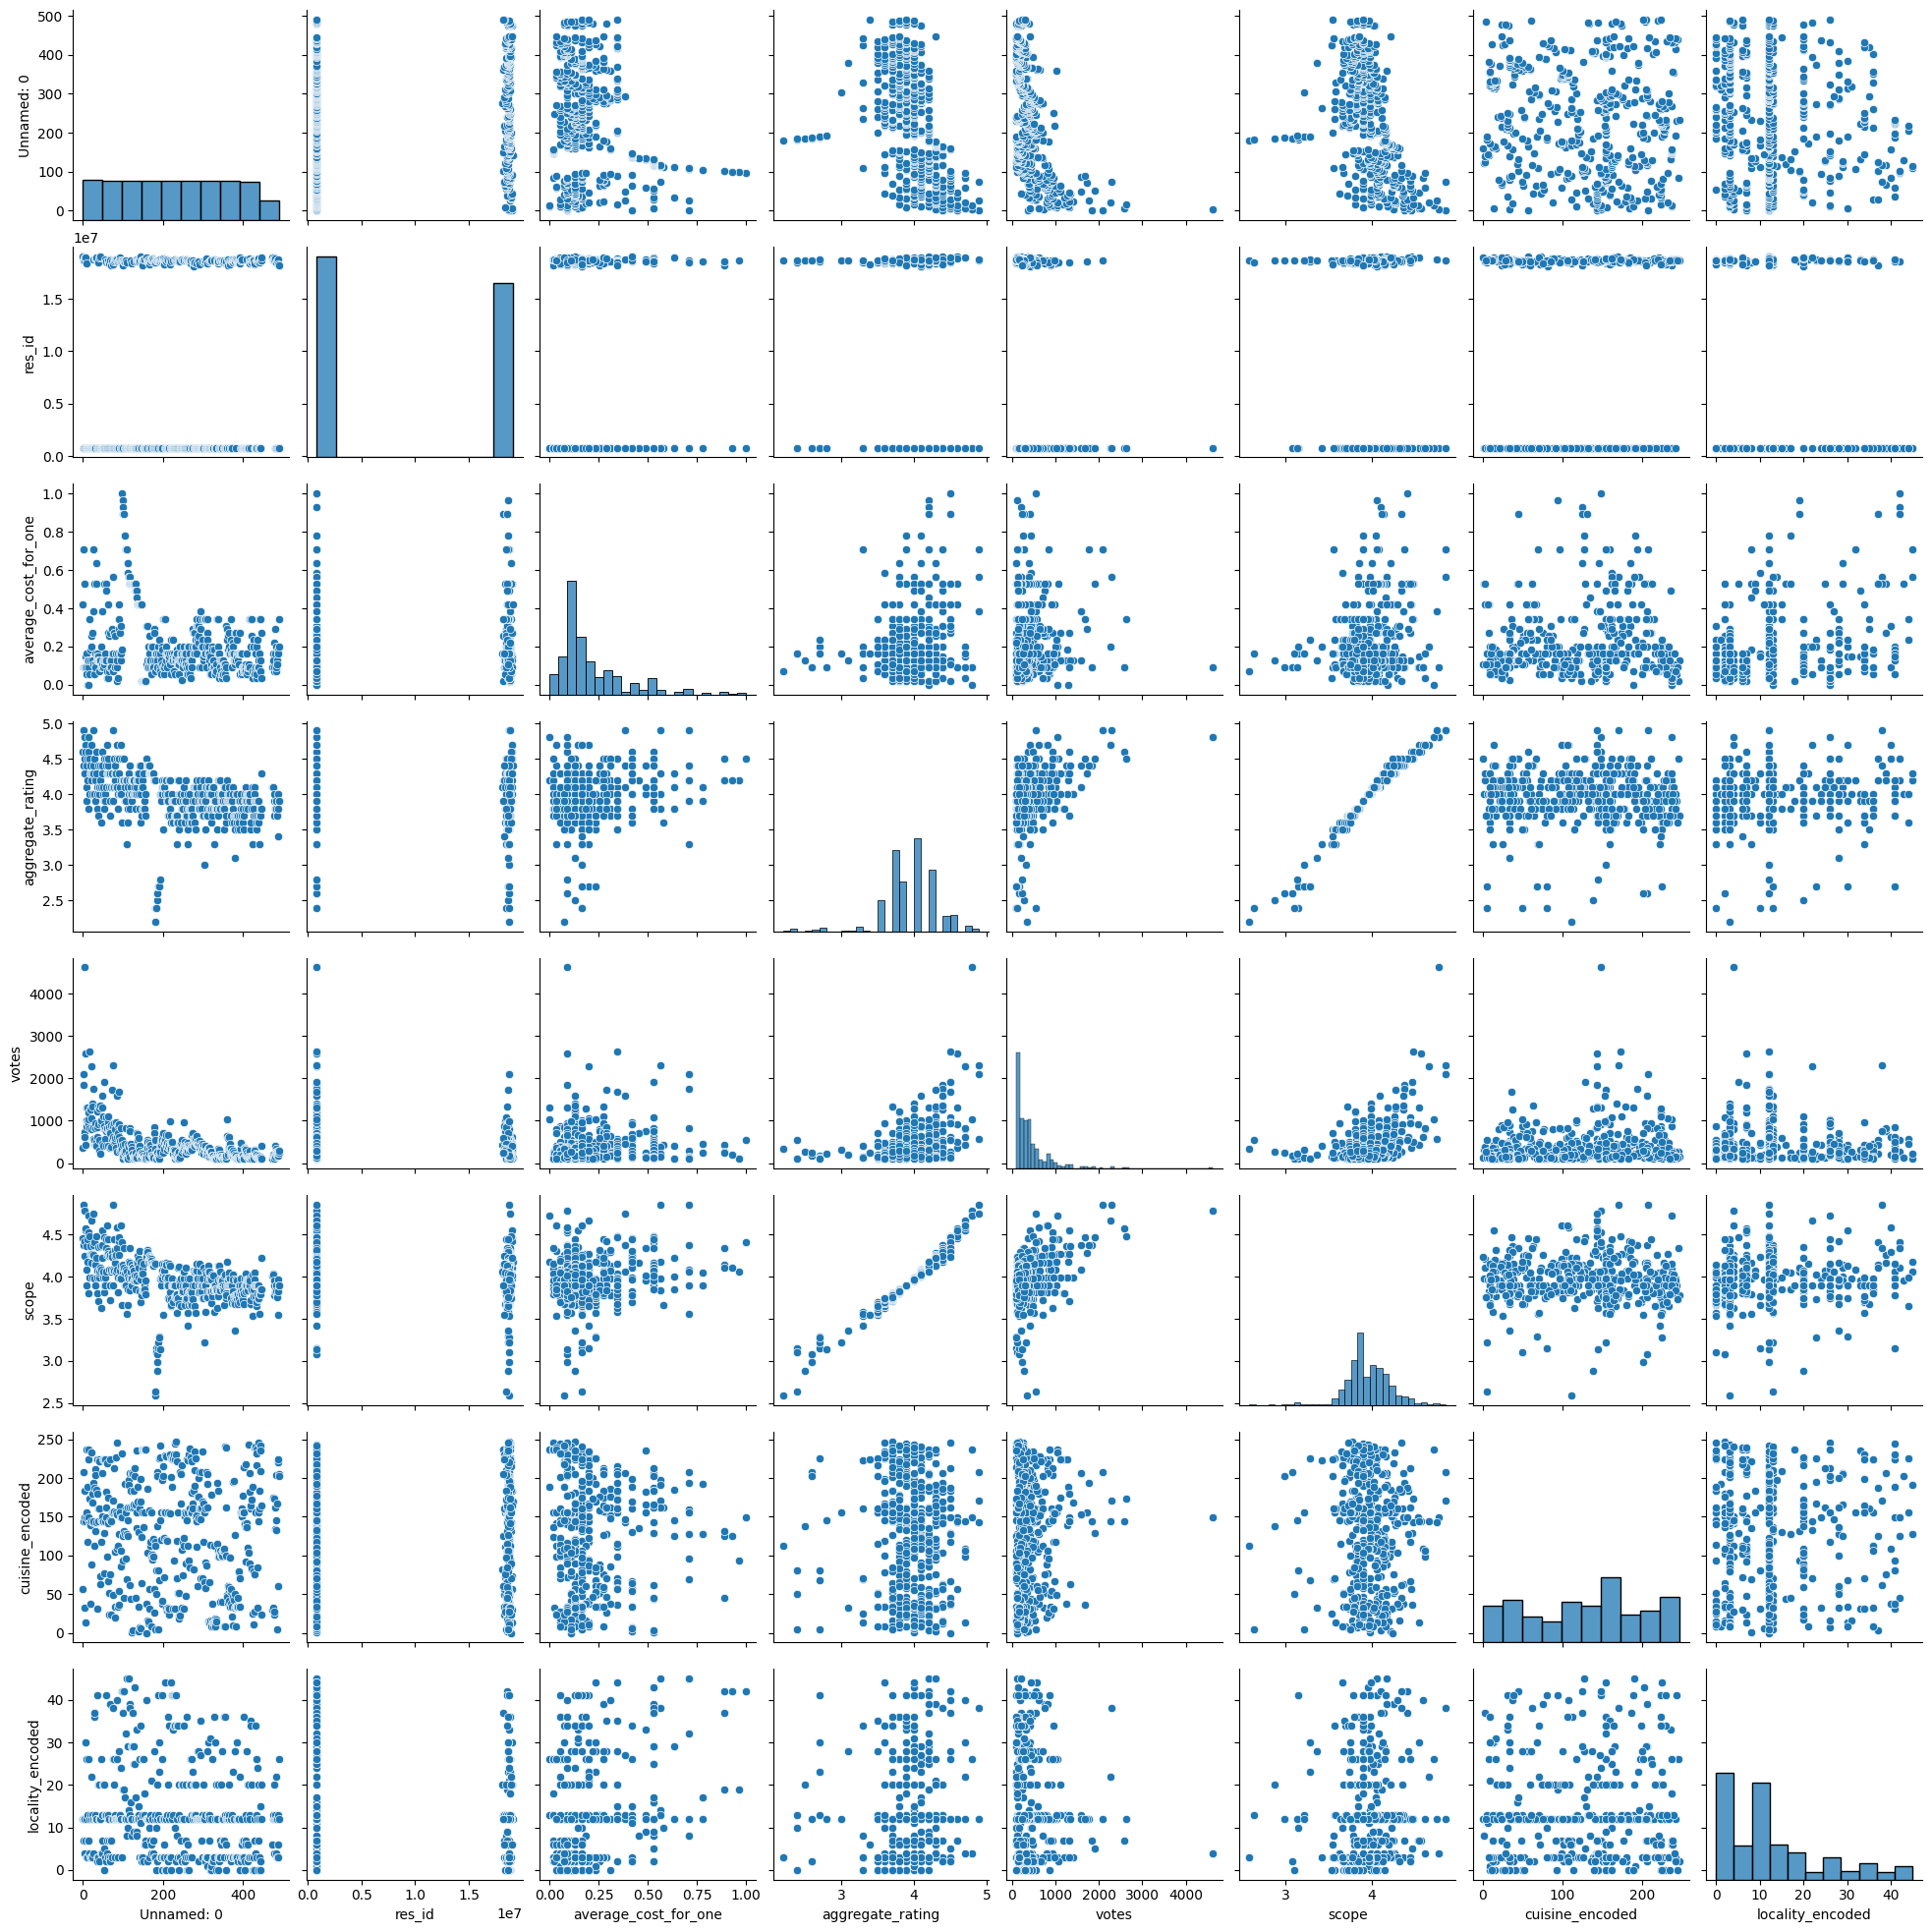

In [ ]:
sns.pairplot(df)

<ipython-input-138-fda6395d55cc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_cost_for_one'])


<Axes: xlabel='average_cost_for_one', ylabel='Density'>

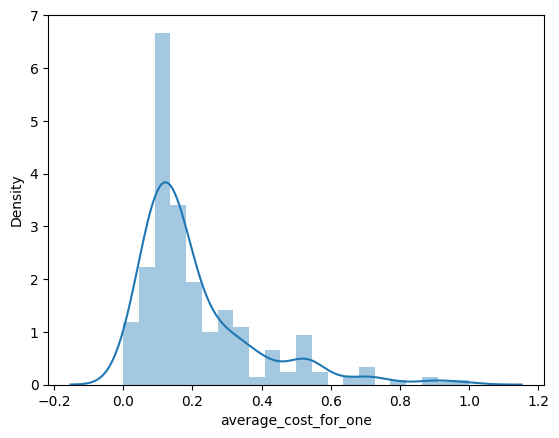

In [ ]:
sns.distplot(df['average_cost_for_one'])

<ipython-input-139-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

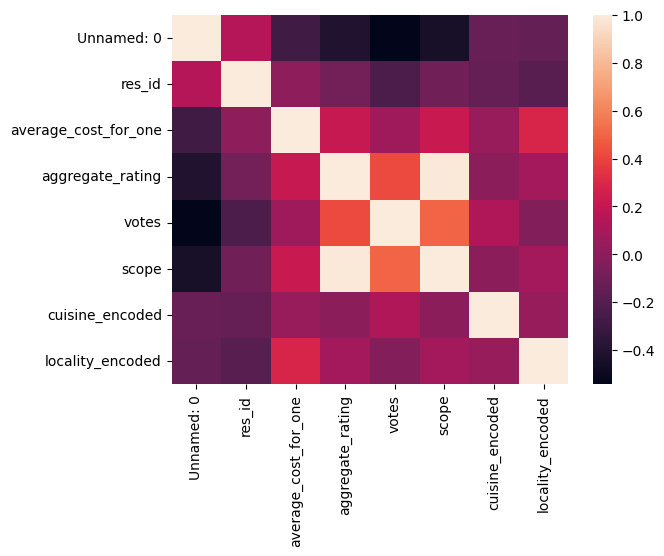

In [ ]:
sns.heatmap(df.corr())

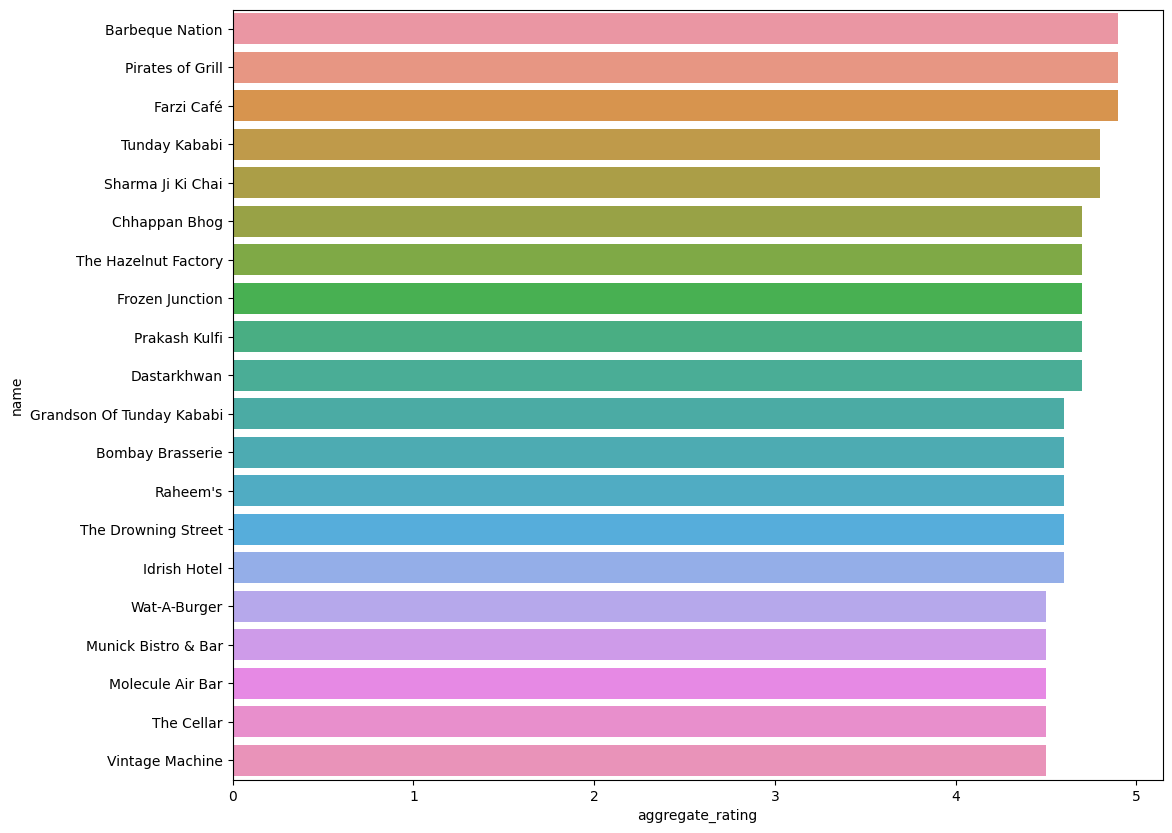

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x = 'aggregate_rating', y = 'name', data = top_restaurants, ax=ax);
plt.savefig('top20_restaurants.png')
plt.show()

In [ ]:
df['aggregate_rating'].astype("float")

0      4.6
1      4.4
2      4.9
3      4.8
4      4.3
      ... 
460    4.0
461    3.8
462    3.4
463    3.9
464    3.9
Name: aggregate_rating, Length: 465, dtype: float64

# **Count of ratings as between "1 and 2", "2 and 3", "3 and 4", and "4 and 5"**

In [ ]:
df['aggregate_rating'].unique()

array([4.6, 4.4, 4.9, 4.8, 4.3, 4.5, 4.7, 3.9, 4.1, 4.2, 3.8, 4. , 3.7,
       3.6, 3.3, 2.2, 2.4, 2.5, 2.6, 2.7, 2.8, 3.5, 3. , 3.1, 3.4])

In [ ]:
df['aggregate_rating'].min()

2.2

In [ ]:
df['aggregate_rating'].max()

4.9

In [ ]:
df['aggregate_rating']=df['aggregate_rating'].astype(float)

In [ ]:
((df['aggregate_rating']>=1) & (df['aggregate_rating']<2)).sum()

0

In [ ]:
((df['aggregate_rating']>=2) & (df['aggregate_rating']<3)).sum()

12

In [ ]:
((df['aggregate_rating']>=3) & (df['aggregate_rating']<4)).sum()

211

In [ ]:
(df['aggregate_rating']>=4).sum()

242


# **Plotting the counts with the help of pie chart**

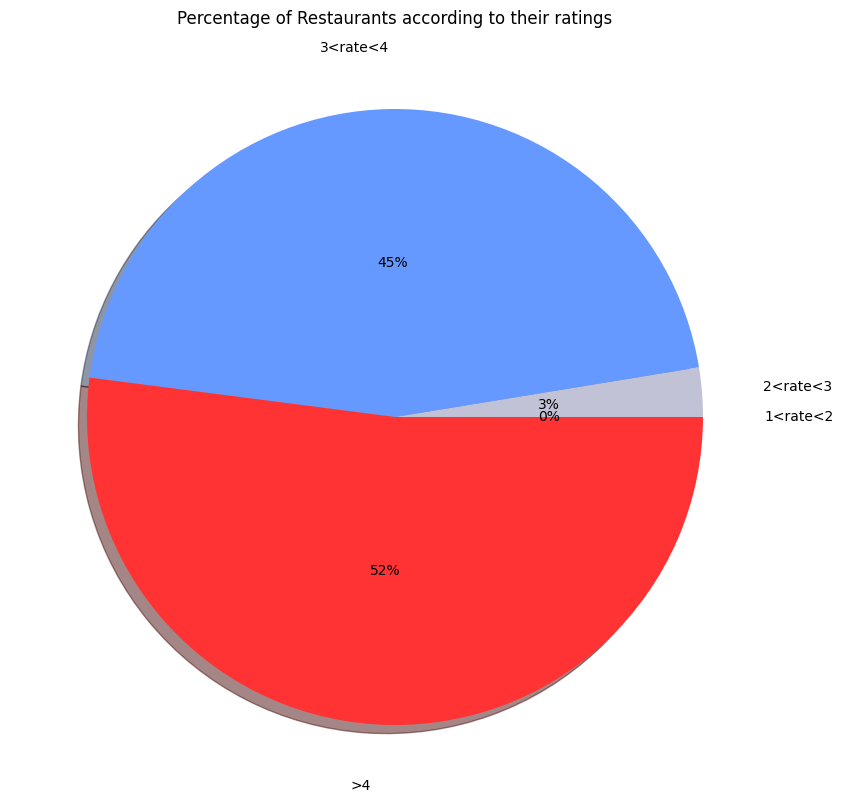

In [ ]:
slices=[((df['aggregate_rating']>=1) & (df['aggregate_rating']<2)).sum(),
        ((df['aggregate_rating']>=2) & (df['aggregate_rating']<3)).sum(),
        ((df['aggregate_rating']>=3) & (df['aggregate_rating']<4)).sum(),
        (df['aggregate_rating']>=4).sum()
        ]

labels=['1<rate<2','2<rate<3','3<rate<4','>4']
colors = ['#ff3333','#c2c2d6','#6699ff']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")

fig.set_size_inches(10,10)
plt.show()

# **KNN**

In [ ]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Preprocess your data (label encoding for categorical variables)
label_encoder = LabelEncoder()
df['cuisine_encoded'] = label_encoder.fit_transform(df['cuisines'])
df['locality_encoded'] = label_encoder.fit_transform(df['locality'])

# Scale numeric variables if needed (e.g., Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['average_cost_for_one'] = scaler.fit_transform(df[['average_cost_for_one']])
#df['locality_encoded']
#df['cuisine_encoded']
#df['average_cost_for_one']

In [ ]:
# Select relevant features for KNN
X = df[['cuisine_encoded', 'average_cost_for_one', 'locality_encoded']]

# Create a KNN model
knn = NearestNeighbors(n_neighbors=5)
knn.fit(X)

# Define the input data (all values should be numeric)
input_data = [[57,  0.418182, 12]]

# Find nearest neighbors (restaurants) to the given input
distances, indices = knn.kneighbors(input_data)

# Get recommended restaurants based on distances and indices
recommended_restaurants = df.iloc[indices[0]]

# Print the recommended restaurants
print(recommended_restaurants)


     Unnamed: 0    res_id                    name  \
0             0  19000106     The Drowning Street   
370         370    801903           The Jail Cafe   
165         165  18310483         Sheroes Hangout   
364         364    801636    The Chocolate Heaven   
91           91  18639593  The Flying Saucer Cafe   

                                                   url  \
0    https://www.zomato.com/lucknow/the-drowning-st...   
370  https://www.zomato.com/lucknow/the-jail-cafe-g...   
165  https://www.zomato.com/lucknow/sheroes-hangout...   
364  https://www.zomato.com/lucknow/the-chocolate-h...   
91   https://www.zomato.com/lucknow/the-flying-sauc...   

                                               address     city     locality  \
0         TCG 3/3, Vibhuti Khand, Gomti Nagar, Lucknow  Lucknow  Gomti Nagar   
370  A-3/172, Patrakarpuram Crossing Road, Vidhayak...  Lucknow  Gomti Nagar   
165  Near Ambedkar Circle, Beside Lucknow Metro Hea...  Lucknow  Gomti Nagar   
364  3/553, 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Assuming you have already fit a KNN model to the data
# Define and fit the KNN model
knn = NearestNeighbors(n_neighbors=5)
X = df[['cuisine_encoded', 'average_cost_for_one', 'locality_encoded']]
knn.fit(X)
# Input data for recommendations
input_data = [[57, 0.418182, 12]]

# Find k-nearest neighbors
distances, indices = knn.kneighbors(input_data)

# Get the recommended restaurants based on distances and indices
recommended_restaurants = df.iloc[indices[0]]['name'].tolist()

# Assuming you have user interaction data with relevant items
# This is just a conceptual example; replace it with your actual data
relevant_items = ['The Drowning Street ', 'The Jail Cafe', 'Sheroes Hangout']

# Calculate precision and recall for the recommendations
def calculate_precision_recall(recommended_items, relevant_items):
    # Calculate the number of recommended items that are relevant
    true_positives = len(set(recommended_items).intersection(relevant_items))

    # Calculate precision
    precision = true_positives / len(recommended_items) if len(recommended_items) > 0 else 0.0

    # Calculate recall
    recall = true_positives / len(relevant_items) if len(relevant_items) > 0 else 0.0

    return precision, recall

precision, recall = calculate_precision_recall(recommended_restaurants, relevant_items)

print(f"Precision: {precision}")
print(f"Recall: {recall}")


Precision: 0.4
Recall: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[['cuisine_encoded', 'average_cost_for_one', 'locality_encoded']]

y = df['aggregate_rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regression_model.intercept_)

3.8496127909870106


In [ ]:
coeff_df = pd.DataFrame(regression_model.coef_,X.columns,columns = ["coefficient"])
coeff_df

,coefficient
cuisine_encoded,0.000005
average_cost_for_one,0.375919
locality_encoded,0.001655


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['coefficient'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['coefficient'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_3, *['coefficient', 'index'], **{'inner': 'stick'})
chart

In [ ]:
y_pred = regression_model.predict(X_test)

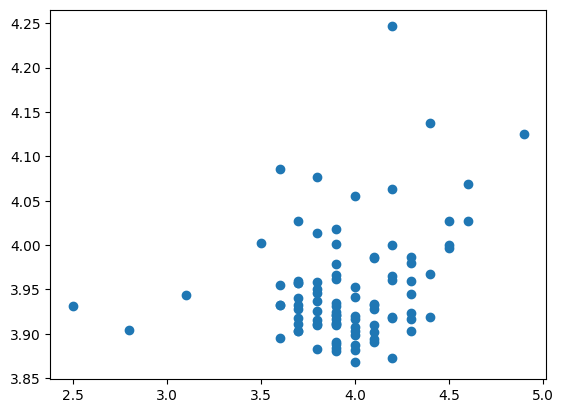

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn import metrics

In [ ]:
# Evaluate the model
print("Mean Squared Error:",metrics.mean_squared_error(y_test, y_pred))
print('MAE :',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Squared Error: 0.10733644467208416
MAE : 0.23538343772995907
RMSE : 0.32762241173656625


# **KMeans Clustering**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Assuming you have features that you want to use for clustering
features = ['cuisine_encoded', 'average_cost_for_one', 'locality_encoded']
X = df[features]
distortions = []

# Standardize your data (important for k-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Specify the number of clusters (k)
k = 5  # You can change this to the desired number of clusters

# Create a KMeans model and fit it to your data
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled)

# Add cluster labels to your original DataFrame
df['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

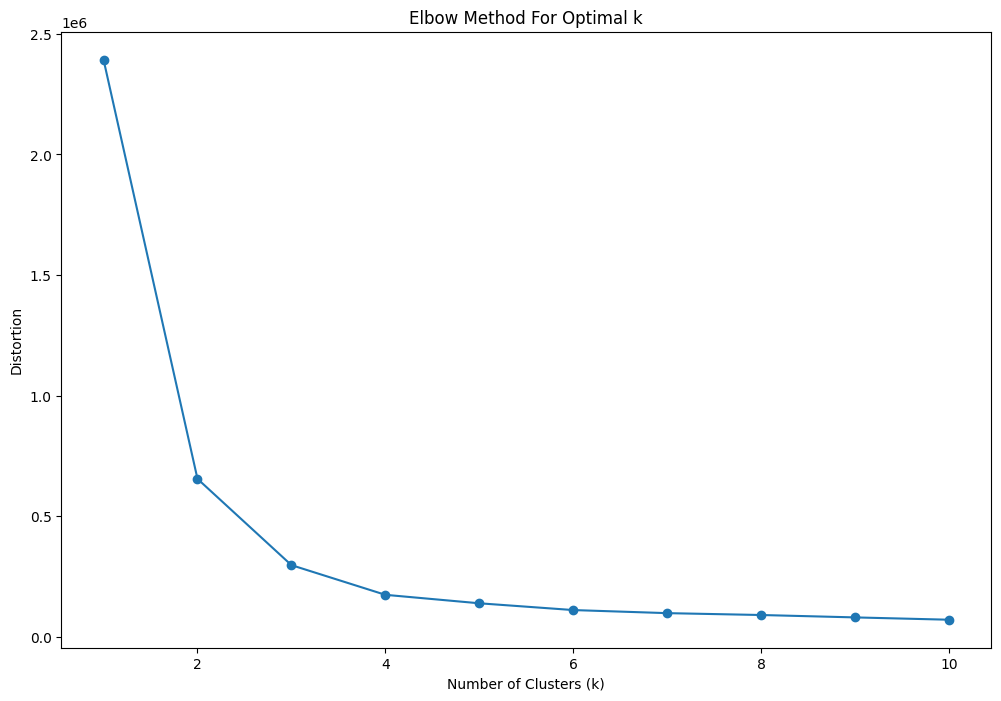

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming data is stored in X
k_values = range(1, 11)  # Test different values of k
distortions = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(12, 8))
plt.plot(k_values, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
import pickle

In [ ]:
# Pickle the K-Means model
with open('knn_model.pkl', 'wb') as model_file:
    pickle.dump(knn, model_file)


In [ ]:
# Load the K-Means model
with open('knn_model.pkl', 'rb') as model_file:
    loaded_knn = pickle.load(model_file)


- **Precision** is a measure of the accuracy of the recommendations. It tells you what proportion of the recommended items were relevant to the user. In your case, a precision of 0.4 means that 40% of the recommended restaurants were relevant to the user.

- **Recall** is a measure of the coverage of the relevant items in the recommendations. It tells you what proportion of the relevant items were successfully recommended. A recall of approximately 0.67 means that 67% of the relevant restaurants were included in the recommendations.

These values are typically between 0 and 1, with higher values indicating better performance. So, in this case, a precision of 0.4 and a recall of 0.67 suggest that the recommendations are somewhat accurate and manage to cover a significant portion of the relevant items, but there is room for improvement.

**we wont get accuracy bcz we r not performin classification or regression, you're just finding neighbors in your feature space based on distances.**

The NearestNeighbors class in scikit-learn is primarily used for unsupervised tasks like finding nearest neighbors, clustering, and dimensionality reduction. It doesn't provide a straightforward way to compute confusion matrices or classification reports because these are typically used in supervised machine learning tasks like classification or regression, where you have both features (X) and labels (y).

The metrics you've mentioned are common evaluation metrics for regression models, like the linear regression model you applied to your restaurant recommendation problem. Here's what they mean:

1. **Mean Squared Error (MSE)**: MSE measures the average of the squared differences between the actual (observed) values and the predicted values. In your case, the MSE of approximately 0.107 suggests that, on average, your model's predictions are quite close to the actual user ratings. Lower MSE values indicate better model performance, with zero being a perfect fit.

2. **Mean Absolute Error (MAE)**: MAE is another measure of the absolute errors between the actual and predicted values. MAE measures the average of these absolute differences. In your case, the MAE of approximately 0.235 indicates the average magnitude of prediction errors. Smaller MAE values are preferable, as they mean the model's predictions are closer to the actual values.

3. **Root Mean Squared Error (RMSE)**: RMSE is the square root of the MSE and is used to measure the standard deviation of the prediction errors. An RMSE value of approximately 0.328 suggests that, on average, your model's predictions are typically off by about 0.328 units concerning user ratings. Like the MSE, lower RMSE values are better.

In summary, the lower these error metrics (MSE, MAE, RMSE), the better your model's performance in predicting user ratings. Your model seems to perform reasonably well, with the given metrics indicating that it's making predictions that are relatively close to the actual user ratings.

The "Elbow Method" is a technique to determine the optimal number of clusters for a K-Means clustering algorithm. It looks for an "elbow" point in the plot where the distortion starts to decrease at a slower rate. The number of clusters corresponding to this point is considered optimal for clustering your data. The code helps you visualize this concept by plotting distortions for different values of k.